<IPython.core.display.Javascript object>


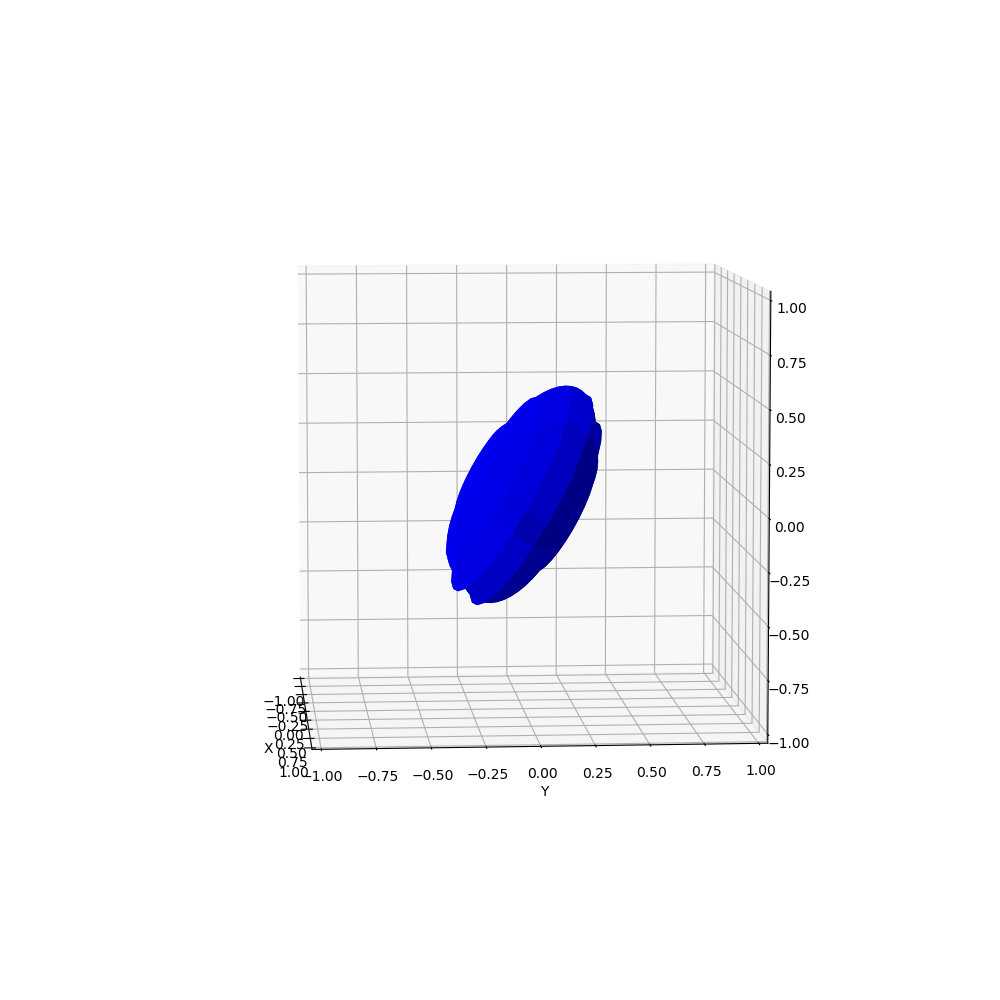

[[ 1.         0.         0.       ]
 [ 0.         0.5       -0.8660254]
 [ 0.         0.8660254  0.5      ]]


In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
plt.rcParams['figure.figsize']=10,10
fig = plt.figure(figsize=plt.figaspect(1))  # Square figure
ax = fig.add_subplot(111, projection='3d')

coefs = (1, 3, 15)  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
rx, ry, rz = 1/np.sqrt(coefs)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 30)
v = np.linspace(0, np.pi, 30)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))


xr = np.reshape(x, (1,-1))
yr = np.reshape(y, (1,-1))
zr = np.reshape(z, (1,-1))

alpha = np.pi/3

RX = np.array([[1,0,0],[0,np.cos(alpha),-np.sin(alpha)],[0,np.sin(alpha),np.cos(alpha)]])
print(RX)
rRotx = RX@np.vstack((xr,yr,zr))

# Plot:
ax.plot_surface(np.reshape(rRotx[0,:],(30,30)), np.reshape(rRotx[1,:],(30,30)), 
                np.reshape(rRotx[2,:],(30,30)), rstride=4, cstride=4, color='b')

plt.xlabel('X')
plt.ylabel('Y')
# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

plt.show()

In [6]:
mm = np.array([2.71, 10.22, 26.52])
lm = np.array([2.92, 10.10, 18.85])
fh = np.array([5.05, 41.90, 15.41])
mc = np.array([8.29, 41.88, 26.52])
ajc = (mm + lm)/2
kjc = (fh + mc)/2